<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Monte%20Carlo%20simulation/2023_summer_CCP/3_Ising_Model/cluster_size_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster distribution

In [5]:
import numpy as np

def initialize_lattice(L, p=[0.2, 0.8]):
    """Initialize a random LxL lattice (-1 or 1)"""
    return np.random.choice([-1,1], size=(L,L), p=p)

def hoshen_kopelman(lattice):
    """Implement Hoshen-Kopelman algorithm for 2D lattice."""
    L = lattice.shape[0]
    label = 2  # Start labeling clusters from 2
    labels = np.zeros((L, L), dtype=int)

    for i in range(L):
        for j in range(L):
            if lattice[i, j] == 1:
                neighbors = []
                if i > 0 and labels[i-1, j] > 0:
                    neighbors.append(labels[i-1, j])
                if j > 0 and labels[i, j-1] > 0:
                    neighbors.append(labels[i, j-1])

                if not neighbors:
                    labels[i, j] = label
                    label += 1
                else:
                    min_label = min(neighbors)
                    labels[i, j] = min_label
                    for l in neighbors:
                        if l != min_label:
                            labels[labels == l] = min_label

    return labels

def cluster_size_distribution(labels):
    """Compute cluster size distribution."""
    unique, counts = np.unique(labels[labels != 0], return_counts=True)
    return counts


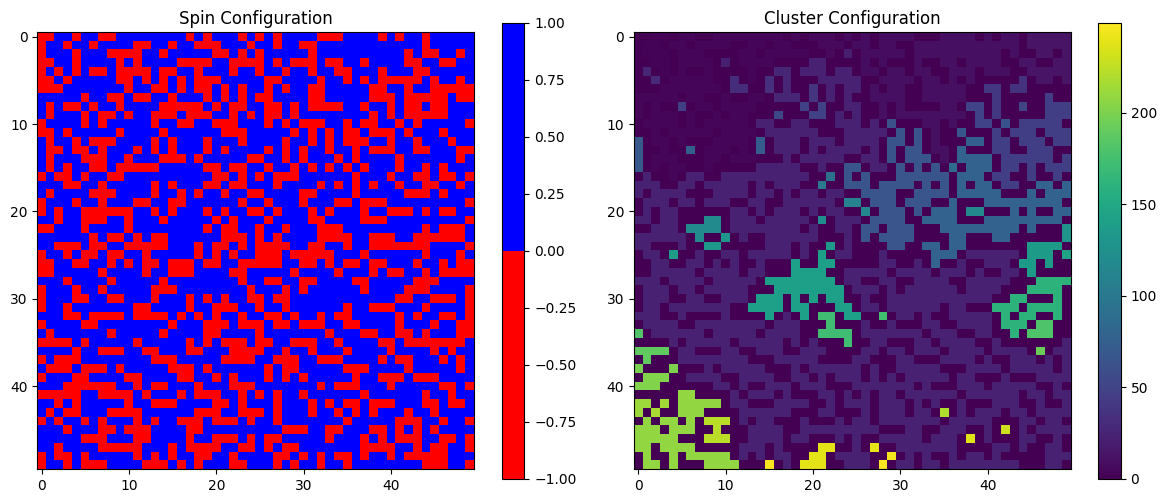

761


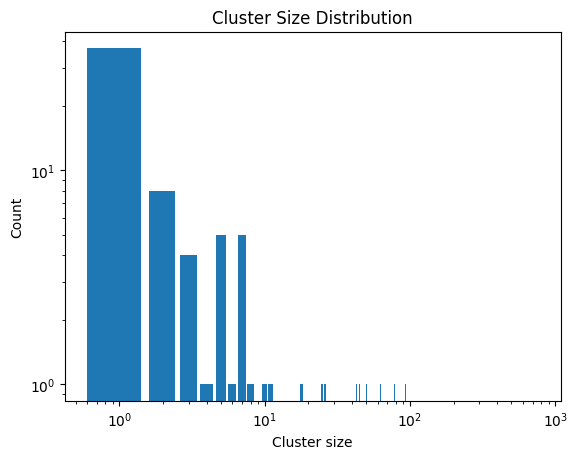

In [18]:
L = 50
lattice = initialize_lattice(L, p=[0.4, 0.6])
labels = hoshen_kopelman(lattice)
cluster_sizes = cluster_size_distribution(labels)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Plot original spin configuration
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cmap = ListedColormap(['red', 'blue'])
plt.imshow(lattice, interpolation='none', cmap=cmap)
plt.title("Spin Configuration")
plt.colorbar()

# Plot cluster configuration
plt.subplot(1, 2, 2)
plt.imshow(labels, interpolation='none', cmap='viridis')
plt.title("Cluster Configuration")
plt.colorbar()

plt.tight_layout()
plt.show()

# Plot cluster size distribution
print (cluster_sizes.max())
plt.hist(cluster_sizes, bins=np.linspace(0.5, cluster_sizes.max()+0.5, cluster_sizes.max()+1), align='mid', rwidth=0.8)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Cluster size")
plt.ylabel("Count")
plt.title("Cluster Size Distribution")
plt.show()